In [90]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pickle, json

import warnings
warnings.filterwarnings("ignore")

### Data Gathering

In [91]:
df = pd.read_csv(r'D:\Data_Science\Practice\Logistic_Regression\Churn_Prediction\static\csv_files')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [92]:
df.columns


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [94]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### EDA

#### 1.Gender

In [95]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [96]:
df['gender'].replace({'Male':1, 'Female':0}, inplace = True)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [97]:
gender_data = {'Male':1, 'Female':0}

In [98]:
df['gender'].value_counts()

1    5457
0    4543
Name: gender, dtype: int64

#### 2. country

In [99]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [100]:
df = pd.get_dummies(df, columns=['country'], dtype = int)
df

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [101]:
df[['country_France', 'country_Germany', 'country_Spain']].value_counts()

country_France  country_Germany  country_Spain
1               0                0                5014
0               1                0                2509
                0                1                2477
dtype: int64

### 3. credit_card

In [102]:
df['credit_card'].value_counts()


1    7055
0    2945
Name: credit_card, dtype: int64

### 4. products_number

In [103]:
df["products_number"].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  country_France    10000 non-null  int32  
 12  country_Germany   10000 non-null  int32  
 13  country_Spain     10000 non-null  int32  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


In [105]:
df['country_France']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    1
Name: country_France, Length: 10000, dtype: int32

### 5. Target column

In [106]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

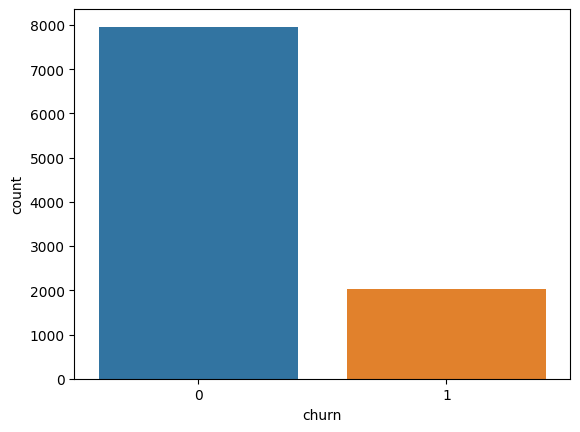

In [107]:
sns.countplot(x = df['churn'])

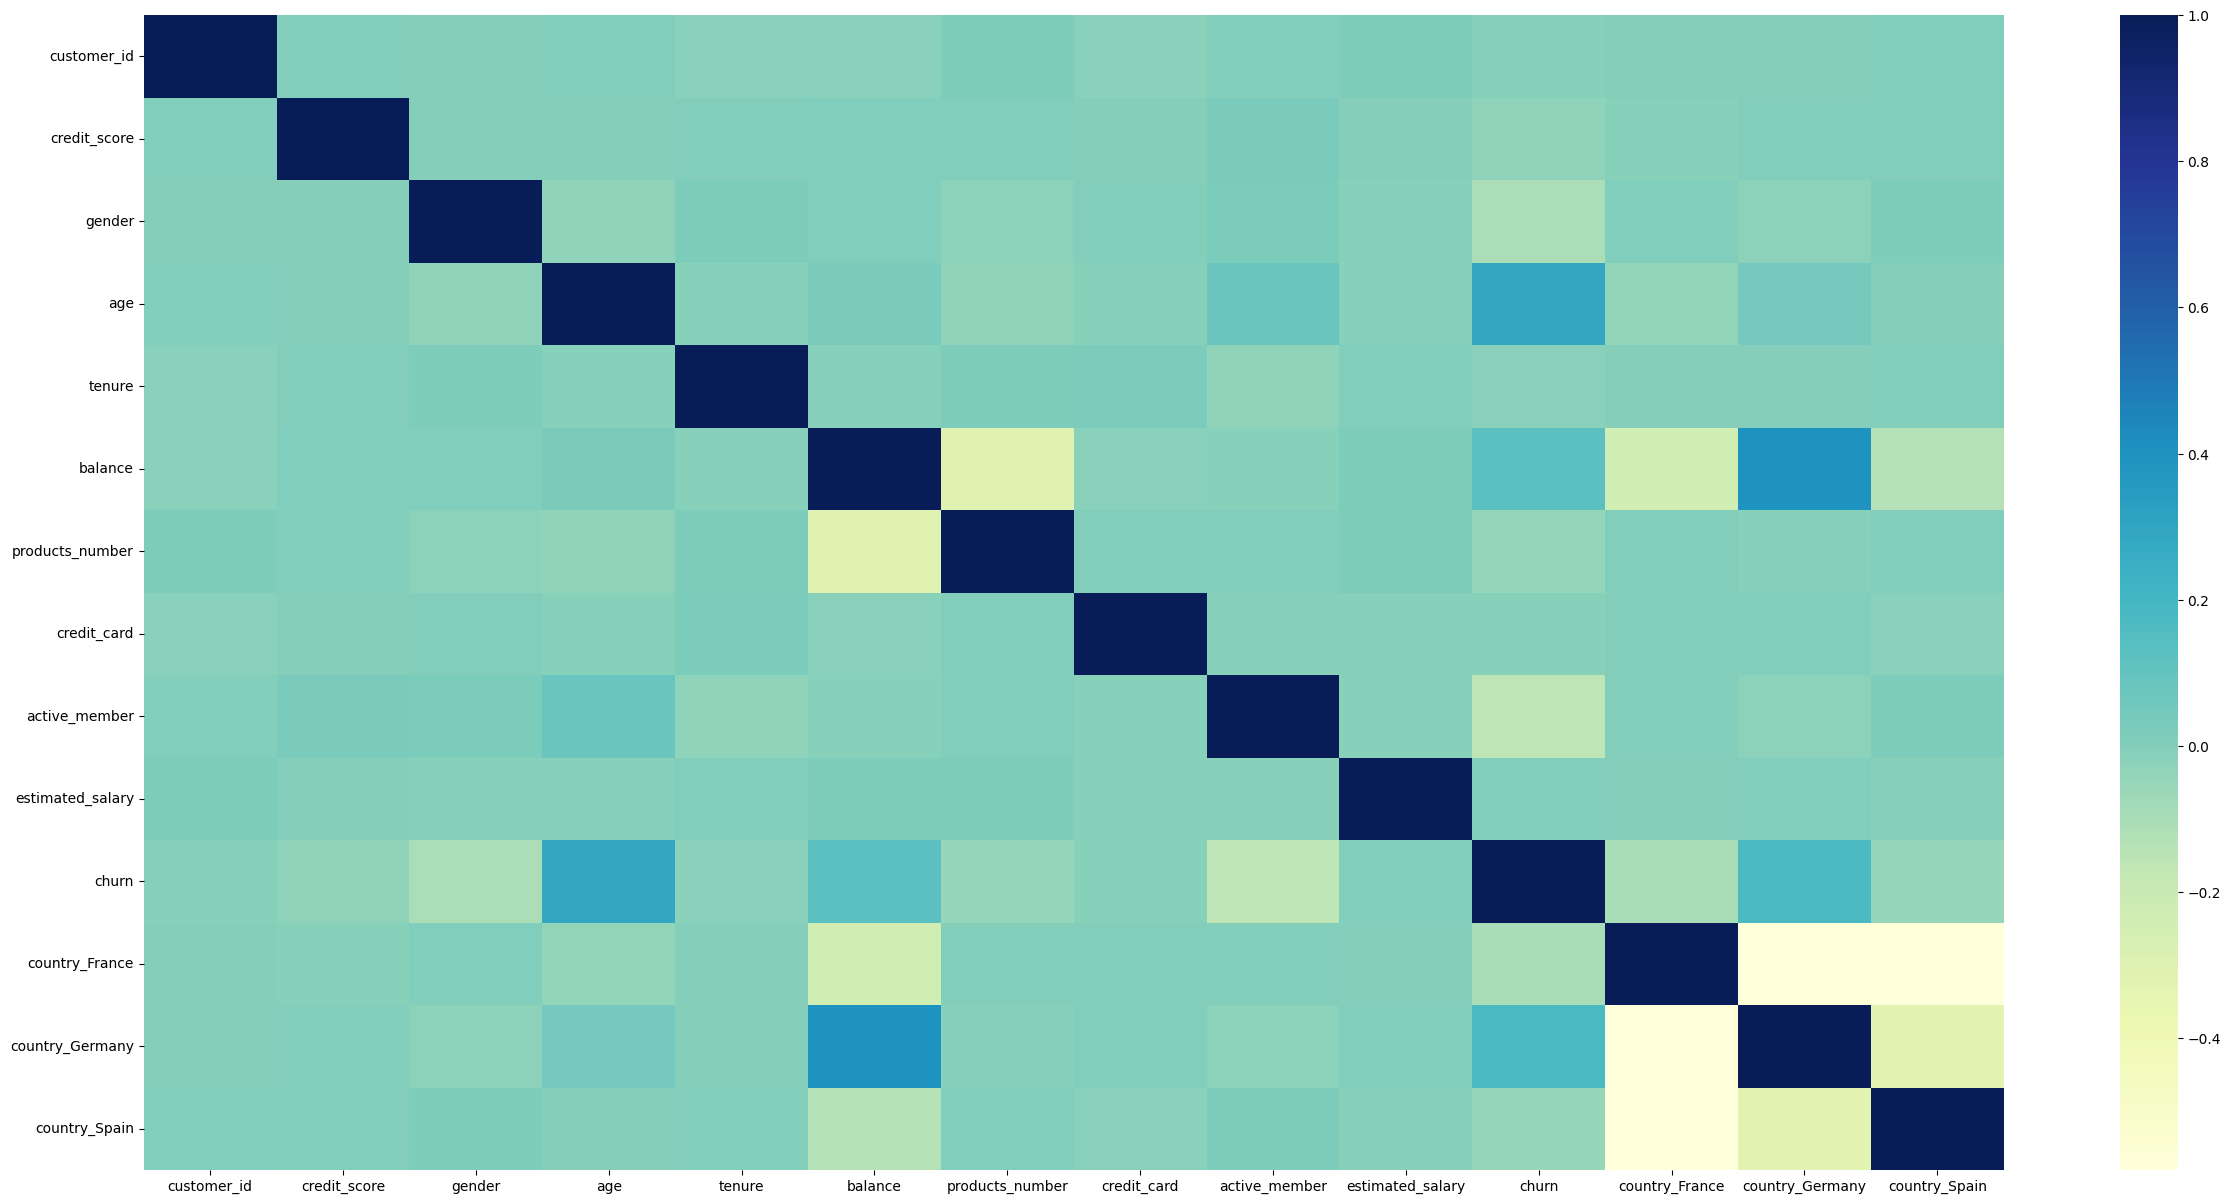

In [108]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(df.corr(), cmap = 'YlGnBu')

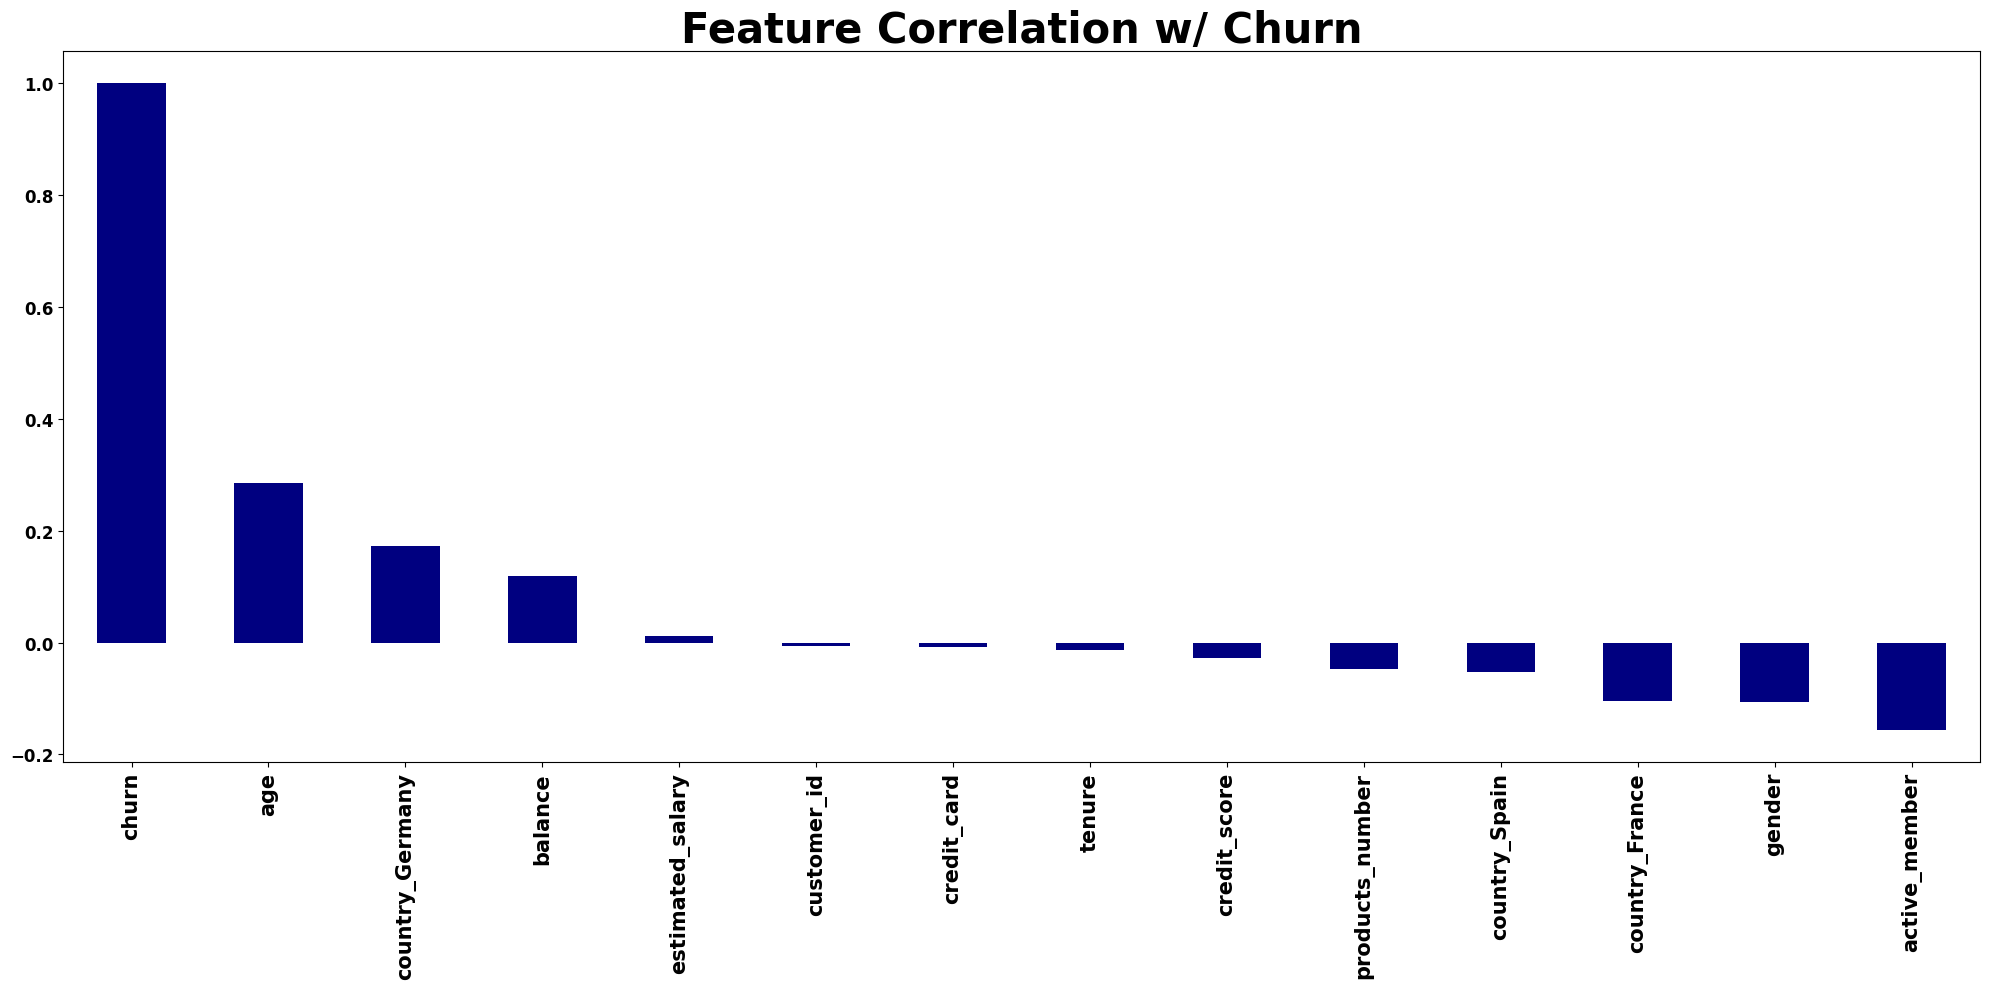

In [109]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
df.corr()['churn'].sort_values(ascending = False).plot(kind = 'bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.savefig('corr.png')
plt.tight_layout()

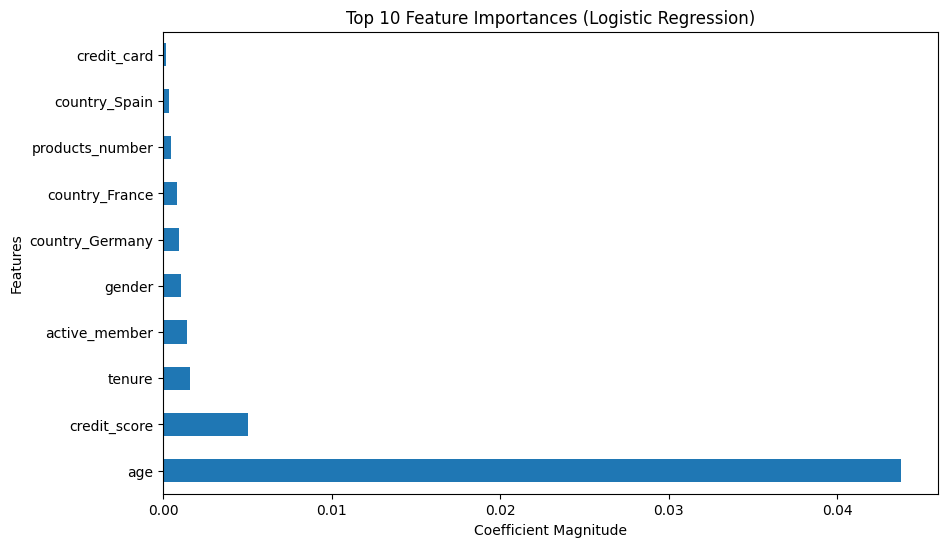

<Figure size 640x480 with 0 Axes>

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained logistic regression classifier named "logreg" and a feature matrix "X"

# Fit logistic regression model
logistic_reg.fit(x, y)

# Create a pandas Series with coefficient magnitudes
feat_importances = pd.Series(abs(logistic_reg.coef_[0]), index=x.columns)
top_10_feats = feat_importances.nlargest(10)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.show()
plt.savefig('Important Features')


### Model Training

In [133]:
x = df.drop(['churn','customer_id'], axis = 1)
y = df['churn']

In [134]:
x.columns.tolist()

['credit_score',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'country_France',
 'country_Germany',
 'country_Spain']

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=13, stratify = y)

In [136]:
x_train.shape

(7000, 12)

In [137]:
x_test.shape

(3000, 12)

In [138]:
y_train.value_counts()

0    5574
1    1426
Name: churn, dtype: int64

In [139]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)

In [140]:
# x_train_scaled

In [141]:
# x_train_scaled.shape

In [142]:
# x_test_scaled

In [143]:
# x_test_scaled.shape

In [144]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

#### Evaluation on Testing Data

In [145]:
logistic_reg.score(x_test,y_test)

0.7906666666666666

In [146]:
y_pred = logistic_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
y_pred[1000:1010]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [148]:
y_test[1000:1010]

3607    0
5353    1
2298    0
1336    0
3141    1
6444    0
7038    0
435     0
6756    1
8500    0
Name: churn, dtype: int64

In [149]:
y_test.value_counts()

0    2389
1     611
Name: churn, dtype: int64

In [150]:
confusion_matrix(y_test, y_pred)

array([[2328,   61],
       [ 567,   44]], dtype=int64)

In [151]:
clf_report = classification_report(y_test, y_pred)
print('classification report:\n', clf_report)

classification report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      2389
           1       0.42      0.07      0.12       611

    accuracy                           0.79      3000
   macro avg       0.61      0.52      0.50      3000
weighted avg       0.73      0.79      0.73      3000



In [152]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7906666666666666


#### Evaluation on Training Data

In [153]:
y_pred_train = logistic_reg.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
logistic_reg.score(x_train,y_train) 

0.7894285714285715

In [155]:
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('confusion matrix:\n', cnf_matrix)

confusion matrix:
 [[5440  134]
 [1340   86]]


In [156]:
accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.7894285714285715


In [157]:
# Evaluation on Testing Data

y_pred = logistic_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :\n",accuracy)
print("*"*50)


Confusion Matrix :
 [[2328   61]
 [ 567   44]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      2389
           1       0.42      0.07      0.12       611

    accuracy                           0.79      3000
   macro avg       0.61      0.52      0.50      3000
weighted avg       0.73      0.79      0.73      3000

**************************************************
Accuracy :
 0.7906666666666666
**************************************************


In [158]:
# Evaluation on Training Data

y_pred_train = logistic_reg.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :\n",accuracy)
print("*"*50)

Confusion Matrix :
 [[5440  134]
 [1340   86]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5574
           1       0.39      0.06      0.10      1426

    accuracy                           0.79      7000
   macro avg       0.60      0.52      0.49      7000
weighted avg       0.72      0.79      0.72      7000

**************************************************
Accuracy :
 0.7894285714285715
**************************************************


### ROC Curve

In [159]:
y_pred_train_prob = logistic_reg.predict_proba(x_train)
y_pred_train_prob

array([[0.72761128, 0.27238872],
       [0.85558875, 0.14441125],
       [0.67755229, 0.32244771],
       ...,
       [0.91852646, 0.08147354],
       [0.93260285, 0.06739715],
       [0.54749406, 0.45250594]])

In [160]:
y_pred_train_prob.shape

(7000, 2)

In [161]:
y_test[1000:1010]

3607    0
5353    1
2298    0
1336    0
3141    1
6444    0
7038    0
435     0
6756    1
8500    0
Name: churn, dtype: int64

In [162]:
y_pred_train[1000:1010]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [163]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_train_prob[:,1])

In [164]:
fpr

array([0.00000000e+00, 1.79404377e-04, 1.79404377e-04, ...,
       9.97308934e-01, 9.97308934e-01, 1.00000000e+00])

In [165]:
tpr

array([0.00000000e+00, 0.00000000e+00, 7.01262272e-04, ...,
       9.99298738e-01, 1.00000000e+00, 1.00000000e+00])

In [166]:
thresh

array([1.77377383, 0.77377383, 0.75676727, ..., 0.03651974, 0.03628357,
       0.026721  ])

In [167]:
np.where(np.around(thresh,3) == 0.499)

(array([104], dtype=int64),)

In [168]:
thresh[104]

0.4985589878650776

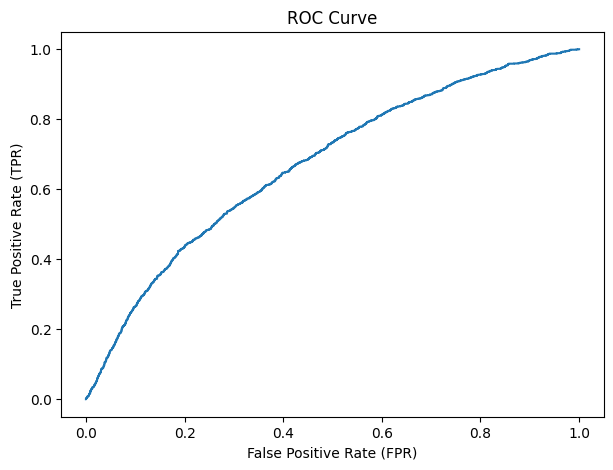

In [169]:
plt.figure(figsize=(7,5))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.savefig("ROC_Curve.png")

In [170]:
import plotly.express as px

In [171]:
px.scatter(x = fpr,y = tpr)

In [172]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_train_prob[:,1])
auc = roc_auc_score(y_train, y_pred_train)

print("Area under curve:", auc)

Area under curve: 0.5181341844095836


In [173]:
X = 0.115

In [174]:
tpr
np.where(fpr > X)

(array([ 499,  500,  501, ..., 2095, 2096, 2097], dtype=int64),)

In [175]:
tpr[500]

0.2966339410939691

In [176]:
fpr[500]

0.1160746322210262

In [177]:
thresh[500]

0.3310325370293888

In [178]:
def get_pred_class(threshold, pred_prob):
    print("Predicted prob is :",pred_prob)
    if pred_prob >= threshold:
        return "Class1"
    
    else:
        return "Class0"

threshold = thresh[2095] # 0.4843

pred_class = get_pred_class(threshold, y_pred_train_prob[:,1][5000])
print("Predicted Class is :",pred_class)

Predicted prob is : 0.24135881005382537
Predicted Class is : Class1


### Prediction on single row

In [179]:
x_test[999:1000]

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
6950,652,0,38,6,123081.84,2,1,1,188657.97,0,0,1


In [180]:
logistic_reg.classes_

array([0, 1], dtype=int64)

In [181]:
logistic_reg.coef_

array([[-5.11807385e-03, -1.04125843e-03,  4.49946425e-02,
        -1.52473386e-03,  3.54760656e-06, -6.80712248e-04,
        -2.04149469e-04, -1.39551944e-03, -1.21305780e-06,
        -8.60912168e-04,  9.48274183e-04, -2.84018170e-04]])

In [182]:
logistic_reg.n_features_in_

12

In [183]:
credit_score = 654
gender = 0
age = 40
tenure = 6
balance = 100000
products_number = 3
credit_card = 1
active_member = 1
estimated_salary = 150000
country_France = 0
country_Germany = 1
country_Spain = 0

test_array = np.array([credit_score,gender,age, tenure, balance, products_number, credit_card, active_member,
                       estimated_salary, country_France, country_Germany, country_Spain], ndmin = 2)

pred_class = logistic_reg.predict(test_array)[0]
print("Predicted Class by using 0.5 threshold is : Class",pred_class)


Predicted Class by using 0.5 threshold is : Class 0


In [184]:
def get_pred_class(threshold, pred_prob):
    print("Predicted prob is :",pred_prob)
    if pred_prob >= threshold:
        return "Class1"
    
    else:
        return "Class0"

threshold = thresh[1922] # 0.104

pred_prob = logistic_reg.predict_proba(test_array)[0,1]

pred_class = get_pred_class(threshold, pred_prob)
print("Predicted Class is :",pred_class)


Predicted prob is : 0.19993971179237865
Predicted Class is : Class1


In [185]:
column_names = x.columns.tolist()
column_names

['credit_score',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'country_France',
 'country_Germany',
 'country_Spain']

In [186]:
credit_score = 654
gender = 'Male'
age = 40
tenure = 6
balance = 100000
products_number = 3
credit_card = 1
active_member = 1
estimated_salary = 150000
country = 'Spain'


gender = gender_data[gender]
country = 'country_'+country

country_index = column_names.index(country)
country_index

test_array = np.zeros((1,logistic_reg.n_features_in_))
test_array[0, 0] = credit_score
test_array[0, 1] = gender
test_array[0, 2] = age
test_array[0, 3] = tenure
test_array[0, 4] = balance
test_array[0, 5] = products_number
test_array[0, 6] = credit_card
test_array[0, 7] = active_member
test_array[0, 8] = estimated_salary
test_array[0, country_index] = 1

predicted_churn = np.around(logistic_reg.predict(test_array)[0])
predicted_churn

0

In [187]:
with open('logistic_regression.pkl','wb') as f:
    pickle.dump(logistic_reg, f)

In [188]:
proj_data = {"Gender": gender_data,
               "Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(proj_data, f)

In [ ]:
# import pickle
# import json
# import numpy as np
# from sklearn.linear_model import LogisticRegression


# with open('logistic_regression.pkl','rb') as f:
#     model = pickle.load(f)

# with open('proj_data.json','r') as f:
#     json_data = json.load(f)

# def get_churn_prediction(credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country):
    
#     gender = json_data['Gender'][gender]
#     country = 'country_'+country

#     country_index = json_data["Column Names"].index(country)
#     country_index
    
#     test_array = np.zeros([1,logistic_reg.n_features_in_])
#     test_array[0,0] = credit_score
#     test_array[0,1] = gender
#     test_array[0,2] = age
#     test_array[0,3] = tenure
#     test_array[0,4] = balance
#     test_array[0,5] = products_number
#     test_array[0,6] = credit_card
#     test_array[0,7] = active_member
#     test_array[0,8] = estimated_salary
    
#     predicted_churn = np.around(logistic_reg.predict(test_array)[0],3)
#     return predicted_churn


In [ ]:
# from flask import Flask, request, jsonify, render_template
# from utils import get_churn_prediction
# app = Flask(__name__)

# @app.route('/')
# def home():
    
#     return jsonify({"Result":"Successful"})

# @app.route('/test')
# def test():
    

# @app.route('/churn_prediction/predicted_churn')
# def predicted_churn():
#     data = request.form
#     print("Data :",data)
#     credit_score    = data['credit_score']
#     gender          = data['gender']
#     age             = data['age']
#     tenure          = data['tenure']
#     balance         = data['balance']
#     products_number = data['products_number']
#     credit_card     = data['credit_card']
#     active_member   = data['active_member']
#     estimated_salary = data['estimated_salary']
#     country         = data['country']

#     pred_churn = get_churn_prediction(credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country)
    
#     return jsonify({"Result":f"churn prediction == {pred_churn}"})
 
# if __name__ == "__main__":
#     app.run()


In [ ]:
# @app.route('/test', methods=['GET'])
# def home1():
#     return render_template('index.html')

In [ ]:
# <!DOCTYPE html>
# <html>
# <head>
#     <title>Churn Prediction Form</title>
# </head>
# <body>
#     <h2>Churn Prediction Form</h2>
#     <form action="churn_prediction.php" method="POST">
    
#         <label for="credit_score">Credit Score:</label>
#         <input type="text" id="credit_score" name="credit_score" required><br><br>

#         <label for="gender">Gender:</label>
#         <select id="gender" name="gender" required>
#             <option value="male">Male</option>
#             <option value="female">Female</option>
#         </select><br><br>

#         <label for="age">Age:</label>
#         <input type="text" id="age" name="age" required><br><br>

#         <label for="tenure">Tenure:</label>
#         <input type="text" id="tenure" name="tenure" required><br><br>

#         <label for="balance">Balance:</label>
#         <input type="text" id="balance" name="balance" required><br><br>

#         <label for="products_number">Number of Products:</label>
#         <input type="text" id="products_number" name="products_number" required><br><br>

#         <label for="credit_card">Has Credit Card:</label>
#         <select id="credit_card" name="credit_card" required>
#             <option value="yes">Yes</option>
#             <option value="no">No</option>
#         </select><br><br>

#         <label for="active_member">Active Member:</label>
#         <select id="active_member" name="active_member" required>
#             <option value="yes">Yes</option>
#             <option value="no">No</option>
#         </select><br><br>

#         <label for="estimated_salary">Estimated Salary:</label>
#         <input type="text" id="estimated_salary" name="estimated_salary" required><br><br>

#         <label for="country">Country:</label>
#         <input type="text" id="country" name="country" required><br><br>

#         <input type="submit" value="Predict Churn">
#     </form>
# </body>
# </html>


In [ ]:
import os

PORT_NUMBER = 8080

MODEL_FILE_PATH = r'Artifacts/Model/logistic_regression.pkl'

JSON_FILE_PATH = r'Artifacts/JSON_Files/proj.data.json'

In [ ]:
import os

PORT_NUMBER = 8080

MODEL_FILE_PATH = os.path.join('Artifacts', 'Model', 'logistic_regression.pkl')
JSON_FILE_PATH = os.path.join('Artifacts', 'JSON_Files', 'proj.data.json')


In [ ]:
# from flask import Flask, request, jsonify, render_template
# from utils import ChurnPrediction
# from flask import redirect, url_for
# import config 
# import traceback

# model_file_name = config.MODEL_FILE_PATH
# json_file_path = config.JSON_FILE_PATH

# app = Flask(__name__)

# @app.route('/')
# def index():

#     return render_template('index.html')

# @app.route('/predicted_churn', methods = ['GET', 'POST'])
# def predicted_churn():
#     try:
#         if request.method == 'GET':
#             data = request.args
#             print("Data :",data)
            
#             credit_score    = data['credit_score']
#             gender          = data['gender']
#             age             = data['age']
#             tenure          = data['tenure']
#             balance         = data['balance']
#             products_number = data['products_number']
#             credit_card     = data['credit_card']
#             active_member   = data['active_member']
#             estimated_salary = data['estimated_salary']
#             country         = data['country']

#             obj = ChurnPrediction(credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country)
#             pred_churn = obj.get_churn_prediction()
            
#             return render_template('index.html', prediction = pred_churn)

#         elif request.method == 'POST':
#             data = request.form
#             print("Data:",data)

#             credit_score    = data['credit_score']
#             gender          = data['gender']
#             age             = data['age']
#             tenure          = data['tenure']
#             balance         = data['balance']
#             products_number = data['products_number']
#             credit_card     = data['credit_card']
#             active_member   = data['active_member']
#             estimated_salary = data['estimated_salary']
#             country         = data['country']

#             obj = ChurnPrediction(credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country)
#             pred_churn = obj.get_churn_prediction()
            
#             return render_template('index.html', prediction = pred_churn)

#     except:
#         print(traceback.print_exc())
#         return redirect(url_for('index'))

# if __name__ == "__main__":
#      app.run(host= '0.0.0.0', port= config.PORT_NUMBER, debug=False)

    

In [ ]:
# def predicted_churn():
#     try:
#         data = request.form

#         credit_score    = data.get('credit_score')
#         gender          = data.get('gender')
#         age             = data.get('age')
#         tenure          = data.get('tenure')
#         balance         = data.get('balance')
#         products_number = data.get('products_number')
#         credit_card     = data.get('number_of_credit_card')  # Corrected field name
#         active_member   = data.get('active_member')
#         estimated_salary = data.get('estimated_salary')
#         country         = data.get('country')

#         obj = ChurnPrediction(credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country)
#         pred_churn = obj.get_churn_prediction()

#         return render_template('index.html', prediction=pred_churn)

In [ ]:
# import pickle
# import json
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# import config



# class ChurnPrediction():
#     def __init__(self,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country):

#         self.credit_score = credit_score
#         self.gender = gender
#         self.age = age
#         self.tenure = tenure
#         self.balance = balance
#         self.products_number = products_number
#         self.credit_card = credit_card
#         self.active_member = active_member
#         self.estimated_salary = estimated_salary
#         self.country = country

#     def __load_saved_data(self):

#         with open(config.MODEL_FILE_PATH, 'rb') as f:
#             self.model = pickle.load(f)

#         with open(config.JSON_FILE_PATH,'r') as f:
#             self.json_data = json.load(f)

#     def get_churn_prediction(self, credit_score, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, country):
        
#         self.__load_saved_data()
        
#         gender = self.json_data['Gender'][self.gender]
#         country = 'country_' + self.country
#         country_index = self.json_data["Column Names"].index(country)
        
#         test_array = np.zeros([1, self.model.n_features_in_])
#         test_array[0, 0] = self.credit_score
#         test_array[0, 1] = gender
#         test_array[0, 2] = self.age
#         test_array[0, 3] = self.tenure
#         test_array[0, 4] = self.balance
#         test_array[0, 5] = self.products_number
#         test_array[0, 6] = self.credit_card
#         test_array[0, 7] = self.active_member
#         test_array[0, 8] = self.estimated_salary
#         test_array[0, country_index] = 1
        
#         predicted_churn = self.model.predict(test_array)
#         return predicted_churn



In [ ]:
# def get_churn_prediction(self, credit_score, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, country):
#     self.__load_saved_data()

#     gender = self.json_data['Gender'][self.gender]
#     country = 'country_' + self.country
#     country_index = self.json_data["Column Names"].index(country)

#     test_array = np.zeros([1, 13])  # Update the size to match the number of features
#     test_array[0, 0] = self.credit_score
#     test_array[0, 1] = gender
#     test_array[0, 2] = self.age
#     test_array[0, 3] = self.tenure
#     test_array[0, 4] = self.balance
#     test_array[0, 5] = self.products_number
#     test_array[0, 6] = self.credit_card
#     test_array[0, 7] = self.active_member
#     test_array[0, 8] = self.estimated_salary
#     test_array[0, 9 + country_index] = 1  # Adjust the index assignment based on the number of non-country features

#     predicted_churn = self.model.predict(test_array)
#     return predicted_churn


In [ ]:
import pickle
import json
import numpy as np
from sklearn.linear_model import LogisticRegression
import config

class ChurnPrediction():
    def __init__(self, credit_score, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, country):
        print("****** INIT Function *********")
        self.credit_score = credit_score
        self.gender = gender
        self.age = age
        self.tenure = tenure
        self.balance = balance
        self.products_number = products_number
        self.credit_card = credit_card
        self.active_member = active_member
        self.estimated_salary = estimated_salary
        self.country = country

    def __load_saved_data(self):
        with open(config.MODEL_FILE_PATH, 'rb') as f:
            self.logistic_reg = pickle.load(f)

        with open(config.JSON_FILE_PATH, 'r') as f:
            self.json_data = json.load(f)

    def get_churn_prediction(self):
        
        self.__load_saved_data()
        
        gender = self.json_data['Gender'][self.gender]
        country = 'country_'+ self.country
        country_index = self.json_data["Column Names"].index(country)

        test_array = np.zeros([1,self.logistic_reg.n_features_in_])  
        test_array[0, 0] = self.credit_score
        test_array[0, 1] = gender
        test_array[0, 2] = self.age
        test_array[0, 3] = self.tenure
        test_array[0, 4] = self.balance
        test_array[0, 5] = self.products_number
        test_array[0, 6] = self.credit_card
        test_array[0, 7] = self.active_member
        test_array[0, 8] = self.estimated_salary
        test_array[0, country_index] = 1

        predicted_churn = np.around(self.logistic_reg.predict(test_array)[0])
        return predicted_churn



In [ ]:
def get_churn_prediction(self):
    print("****** INIT Function *********")
    print("self.gender:", self.gender)
    print("self.json_data:", self.json_data)

In [ ]:
from flask import Flask, request, jsonify, render_template, redirect, url_for
import numpy as np
import pickle
import json

app = Flask(__name__)

# Load the logistic regression model and JSON data
with open("logistic_regression.pkl", "rb") as f:
    model = pickle.load(f)

with open("proj_data.json", "r") as f:
    json_data = json.load(f)

@app.route("/ChurnPrediction")
def home():
    
    return jsonify({"Result":"Successful"})

@app.route("/predict_churn", methods=["GET", "POST"])
def predict_churn():
    if request.method == "POST":
        # Get the form data from the request
        data = request.form

        # Extract the feature values
        credit_score = float(data["credit_score"])
        gender = data["gender"]
        age = int(data["age"])
        tenure = int(data["tenure"])
        balance = float(data["balance"])
        products_number = int(data["products_number"])
        credit_card = int(data["credit_card"])
        active_member = int(data["active_member"])
        estimated_salary = float(data["estimated_salary"])
        country = data["country"]

        # Preprocess the input features
        gender_value = json_data["Gender"][gender]
        country_feature = "country_" + country
        country_index = json_data["Column Names"].index(country_feature)

        test_array = np.zeros((1, model.n_features_in_))
        test_array[0, 0] = credit_score
        test_array[0, 1] = gender_value
        test_array[0, 2] = age
        test_array[0, 3] = tenure
        test_array[0, 4] = balance
        test_array[0, 5] = products_number
        test_array[0, 6] = credit_card
        test_array[0, 7] = active_member
        test_array[0, 8] = estimated_salary
        test_array[0, country_index] = 1

        # Make the churn prediction
        predicted_churn = int(np.around(model.predict(test_array)[0]))

        return jsonify({"Result": f"Churn Prediction: {predicted_churn}"})
    

    else:
        # Handle GET request
        return jsonify({"Message": "Please make a POST request to this route."})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=True)
